# Section 1

In [10]:
import base64
import string
import sys
from itertools import cycle

ascii_alphabet = string.ascii_lowercase
english_probs = {"a":8.55,"b":1.6,"c":3.16,"d":3.87,"e":12.1,"f":2.18,"g":2.09,"h":4.96,"i":7.33,"j":0.2,"k":0.81,"l":4.21,"m":2.53,"n":7.17,"o":7.47,"p":2.07,"q":0.1,"r":6.33,"s":6.73,"t":8.94,"u":2.68,"v":1.06,"w":1.86,"x":0.19,"y":1.72,"z":0.11}
base64_ciphertext = "KxRIRjMSEgMUFQkIRhIOA0YKBxEfAxRGEQcVRgdGCwcIRgkARgdGFBMBAQMCRgUJEwgSAwgHCAUDRhIOBxJGEQcVRggDEAMURgoPAQ4SAwJGBB9GB0YVCw8KA11GBQkKAkpGFQUHCBIfRgcIAkYDCwQHFBQHFRUDAkYPCEYCDxUFCRMUFQNdRgQHBQ0RBxQCRg8IRhUDCBIPCwMIEl1GCgMHCEpGCgkIAUpGAhMVEh9KRgIUAwcUH0YHCAJGHwMSRhUJCwMOCRFGCgkQBwQKA0g="

'''
    Gets the probs of each english letter on each "plain text"
'''
def get_text_probs(value):
    result = {}
    l = len(value.lower().strip())
    for i in ascii_alphabet:
      if i in value:
        result[i] = value.count(i)/l 
      else:
        result[i] = 0
    return result
    
'''
    Statistical distance formula
    sd = 1/2 * sum(|pr(x) - pr(y)|)
'''
def statistical_distance(text_prob):
    result = 0.0
    for i in ascii_alphabet:
      result += abs((english_probs[i]/26)-text_prob[i])
    return 1/2*result

'''
    XOR function for decrypt or encrypt
'''
def crypt(msg , key):
  return bytes(a^b for a, b in zip(msg , cycle(key)))


'''
    Get the stadistical distance and text of each number 
    from 0 to 255 into a dictionary
'''    
def lowest_key(ct,elemts = range(0,256)):
  key = 0
  distances = sys.maxsize
  result  = ""
  for i in elemts:
    xorted_ct = crypt(ct, i.to_bytes(1, 'little'))
    plaintext = xorted_ct.decode('UTF-8', errors='replace')
    text_prob = get_text_probs(plaintext)
    sd = statistical_distance(text_prob)
    if sd < distances:
      key = i
      distances = sd
      result = plaintext
  return key,result

'''
    Gets the miniumun stadistical distance of all previously calculated
'''    
def min_distance(keys_distances):
  return min(keys_distances, key=keys_distances.get)

def show_result_1():
  ct_decoded = base64.b64decode(base64_ciphertext)
  kd,pt= lowest_key(ct_decoded)
  print("The recovered plaintext: ", kd)
  print("The decryption key: ", pt)

show_result_1()


The recovered plaintext:  102
The decryption key:  Mr. Utterson the lawyer was a man of a rugged countenance that was never lighted by a smile; cold, scanty and embarrassed in discourse; backward in sentiment; lean, long, dusty, dreary and yet somehow lovable.


# Section 2

Possible Top 3 Key Lengths: [28, 14, 7]


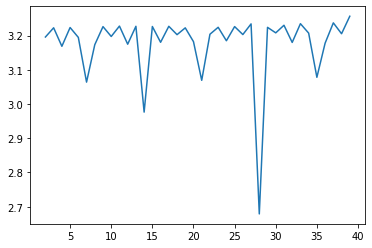


Possible Keys: 
{28: 'AStoryWithoutUsingTheLetterE', 14: 'AithThWiyhsxuS', 7: 'iitortS'}

Due to 28 is the most likely key size we deduce that the key is:  AStoryWithoutUsingTheLetterE


So, as on similar occasions months ago, word that land was again cropping up in Gadsby's mind, brought out a flood of landlords with vacant lots, all looking forward to disposing of a dump worth two dollars and a half, for fifty thousand. Now an airport must occupy a vast lot of land, so cannot stand right in a City's shopping district; but finally a big tract was bought, and right in back of tiny Marian's back yard! Instantly, City Hall was full of applicants for flying Branton Hills' first aircraft. To Gadsby's joy, amongst that bunch was Harold Thompson, an old Organization lad, who was known around town as a chap who could do about anything calling for brains. As an airport is not laid out in a day, Harold got busy with paid aviators and soon was piloting a craft without aid; and not only Branton 

In [11]:
import base64
from heapq import nsmallest
import matplotlib.pyplot as plt

ciphertext_2 = "EjxYTxMKdwYaSBwcGTwfCBxHOwsGLRYdGwsBZSw8GhsaCncIEwdDVQM6AQ1OEzwJEWwJFRoBUjIgIFQOFRg+B1QLHRoEJRoHCUchGEUlC1QzBBY2IypTHFIUPgcQRE8XBjoGDgYTdAcQOEUVVAMeKi43VAAUWTsIGgwDGgYxAEkZDiAARToEFxULBmUtPAAcXlk2BRhIAxobPhoHCUcyBxc7BAYQRQYqYTcdHAIWJAAaD08aEnUSSQoSORhFOwoGAA1SMTY8VAsdFTsIBhtPFBoxUwhODzUEA2BFEhsXUiMoNQAWUg0/BgEbDhsQe1MnARB0CQtsBB0GFR03NXMZGgENdwYXCxoFDXUSSRgGJxxFIAoAVAoUZS0yGgteWSQGVAsOGxo6B0kdEzUGAWwXHRMNBmUoPVQOUjo+HQ1PHFUHPRwZHg46D0UoDAcAFxsmNWhUDQcNdw8dBg4ZGCxTCE4FPQ9FOBcVFxFSMiAgVA0dDDABAERPFBoxUxsHADwcRSULVBYEES5hPBJPBhA5EFQlDgcdNB1OHUc2CQYnRQ0VFxZkYRoaHAYYOR0YEUNVNzwHEE4vNQQJbBIVB0UUMC0/VAAUWTYZBAQGFhU7BxpOATsaRSoJDR0LFWUDIRUBBhY5STwBAxkHclMPBxUnHEUtDAYXFxMjNX1UOx1ZEAgQGw0MUyZTAwEeeEgEIQoaExYGZTU7FRtSGyIHFwBPAhUmUyEPFTsEAWwxHBsIAjYuPVhPExd3BhgMTzoGMhIHBx01HAwjC1QYBBZpYSQcAFIONhpUAwEaAztTCBwIIQYBbBEbAwtSJDJzFU8RETYZVB8HGlQ2HBwCA3QMCmwEFhsQBmUgPQ0bGhA5DlQLDhkYPB0OTgE7GkUuFxUdCwFrYRIHTxMXdwgdGh8aBiFTAB1HOgcRbAkVHQFSKjQnVAYcWTZJEAkWWVQdEhsBCzBIAiMRVBYQATxhJB0bGlknCB0MTxQCPBIdARUnSAQiAVQHCh0rYSQVHFIJPgUbHAYbE3USSQ0VNQ4RbBIdAA0dMDVzFQYWQncIGgxPGxshUwYACy1IJz4EGgAKHGUJOhgDAVkxBhgDHFlUNwYdTgg4DEUtEx0VER03Mn9UHBMOdwAaSCcUBjofDUJHNUhHLgwGEEgfJC9xVAAUWTkGVBsCFBg5UwgMDjgBETVLVDULFmUyPFQbGxcuSTkJHRwVO1QaTkUiARYlChpWRQUkMnMVTxQYNB1PSAUAByFTCB1HdgoMK0UTHRceZ2EfAQwLXiRJLgcATlQ0HQ1CRzUbRTsMABxFEyktcxYGFVkUAAARTxQSMxIAHBR4SAQiRT0aBAciNCEVGxsWOUkHAAAAGDFTGhoGJhxFJRFUGwMUa2EdGxheWTgHVAkDGVQmBgoGRzUOAy0MBgdFCyo0cxUDBRguGlQOBhsQdRJJTBE9Gww4CgZUChRlKTwaAABbbEkVBgtVGztTHQYOJ0gCPgQaEEUWJDhzMw4WCjUQVAsAABgxHU4aRyAADCIOVBsDUiQvKhYAFgB3DxsaTwEcNAdJBwokBxc4BBoARQIqMidUDQcNdyQVGgYUGntTKAADeEgEP0UdAEUFKjQ/EE8dGjQcBkgGG1QUBg4bFCBERS0LDVQBEzxhJBsaHh13DRtETxQHdQcBDxN0ARZsBFQHBhoqLj9UGRMaNh0dBwFVGTodHQZJ"


"""
    2.a
"""
def split_text(text, n):
  return [text[i:i + n] for i in range(0, len(text), n)]

def split_bytes(data, n,returnAll=False):
  ct_decoded = base64.b64decode(data)
  chunks = split_text(ct_decoded, n)
  if returnAll:
    return chunks
  
  if len(chunks[0]) != len(chunks[-1]):
    chunks.pop()
  return chunks

"""
    2.b
"""
def hamming_distance(a, b):
  hd = 0
  for b1,b2 in zip(a,b):
    hd += bin(b1^b2).count('1')
  return hd


"""
    2.c
"""
def most_likely_key_length(text):
  hd_scores_map = {}
  for keySize in range (2,40):
    distances = []
    chunks = split_bytes(text,keySize)
    for a in chunks:
      for b in chunks:
        hd_normalized = hamming_distance(a,b) / keySize
        if hd_normalized > 0:
          distances.append(hd_normalized)
    if len(distances) > 0:
      score = sum(distances) / len(distances)
      hd_scores_map[keySize] = score
  return hd_scores_map

def most_top_n(scores_map, n):
  return nsmallest(n, scores_map, key=scores_map.get)



"""
    2.d
"""
def decrypt_key_by_lenght(text, opts):
  results = {}
  for n in opts:
    text_parts = split_bytes(text,n)
    transpose_parts = list(zip(*text_parts))
    keys = []
    for p in transpose_parts:
      kd,_ = lowest_key(p,range(32,128))
      keys.append(kd)
    results[n] = "".join([chr(i) for i in keys])
  return results



def show_result_2(text, top_n):
  scores_map = most_likely_key_length(text)
  possible_keys_length = most_top_n(scores_map, top_n)
  print(f'Possible Top 3 Key Lengths: {possible_keys_length}')
  plt.plot(*zip(*scores_map.items()))
  plt.show()
  
  key_posibilities = decrypt_key_by_lenght(text, possible_keys_length)
  print("\nPossible Keys: ")
  print(key_posibilities)
  result_key = key_posibilities[possible_keys_length[0]]
  print("\nDue to 28 is the most likely key size we deduce that the key is: ",result_key)

  result_text = crypt(base64.b64decode(ciphertext_2),str.encode(result_key))
  print("\n\n"+result_text.decode('UTF-8'))



show_result_2(ciphertext_2, top_n=3)


  
 

# Section 3

In [87]:
class MiddleSquareWeylSequence:
    """
    Middle Square Weyl Sequence implementation.

    See [Wid19]_ for the proposed version of this PRNG and see
    https://crypto.stackexchange.com/a/62755 for more information on attacking
    the PRNG.
    """
    # Helper functions
    def __init__(self):
        self.s = 0xb5ad4eceda1ce2a9
        self.x,self.w = 0,0 

    def _u32(self, x): return x % (1 << 32)

    def _u64(self, x): return x % (1 << 64)

    _low = _u32

    def _high(self, x): return x >> 32


    def update_state(self):
        """Generate the next state of the Middle Square Weyl Sequence."""
        self.w = self._u64(self.w + self.s)
        self.x = self._u64(self.x * self.x + self.w)
        self.x = (self._low(self.x) << 32) | self._high(self.x)
        return self._low(self.x)


In [116]:
import base64
# pip install pwn
from pwn import *
# pip install z3
# pip install z3-solver
from z3 import *

ciphertext_3 = "zMU5Qis3lghENvYoW35ex2CFqIxD7unCLN/r0xgW9snrSJ7m/Nm8SRLozUBqHh4VrN5aQ5V/7EqHURHDZnDvZdUqe+mOhK0H4lKYR3T/alHLWWvVAFAsEaLgrBLwweaz7fOwfupg43JRd7WU8Q1eTeWp0hrM/S7PFs65LI6TLk2UM/gFKdHQbauZRoQjYEEI+57bucXAtpYPRXhZy3aiez0PAldZ9rBT/JrRHR9WumarpZ2rJePTIVI+cyW5ufzrRQaKEjSP+kng1TY9HaXKkfdspYYfjpFF2Ue2s+LRrakKWQETZ3w5STDSGVPxaLECwu+DqESIQWCgqzP3zsS8A232w++0xdeJaa0aWXV8G0LKSxFPHCuMgVLipQQSMf6plk07dBgieGtpvmeldp6nbVgB/8l+8T9Q6aUb/KS+o7Od3AXNIoSWLtaXq/edp5UYjh9LWOuPQ5AWzSo1gJ058rxbUscIZI1y8qDdcHCFuWS9SACKNQpsHf/FmIMQVcq8CJwZlHqT3/AoeDOXBL7lteheYNiLQRZky+wj2QsnihKgXVYerWPChmRifYTCrdQ8qgWrJdzyDS69yv3Eyt3DsyHwi5H2ujtSh6eCzLnmKp/bhmvi5fvaLIoG4tHGscPx52jdULTCk2xTwHUBMF/3kz4i14exvTpFpLfhyNBs5NQ0wKOJU78+vjsBTZFmpYmfCDBAg3yccqG8I4FQ3mtQqLlbawynWM8E8iFGbNjqKzYqbFjDE4Nk51SniHPsLqgH1EPC68VIMh8DEK5Yg+DZ60SMQQTRenRJJVSXUKUZ9is+elRIhD11q9XNFScwt4sMOt5c89TUbqNMsl/5evxq7V3E5jw7ARhClymCIgu6SMdesf8WdhQNlxyAkwuQ339c2zbf9zFt0h2YDfvH/1UPJ/p1BH54qqB3DzUpbNG5TsO6nmpspyHSvBI+8WPYHkccIK7N3zNtgc2rxnOJG6nTYprOQ85rgeb9YjSXIbimgZRE2NSBH9tLounSoXh7G4LSRoMIF1oPKaChRJoOBqdN5FbT8Yf95UZgpDuz42NMpcD6e/xHE/69RdUkTTxpn0rnGgYcfR0p4xoWj8OK1gYlQr2rY2R7gK8VfdlY3ip4y67h0Tz2iD0dmk28vNXviQHqnLTZkUG9TLnF43g0dcGUylt9lp6sV4uA6sr1WkAWdnWR3zUKBaHzxt0BLAl9WFA6cqhBoSRJBvACANRp+fd3Sl5sWzn8K9R4YuanwekU6yBbU6aL5E1poNgTFJgl+/YlIGvFzuMKGZOkdIu25gD8c0oO6CbhMp9x7TF7w1yNUY2cCvPOfKbyl4hK3dyXwGmAlad/ooNEt0VA64zoBo8+8/vGyBV6JMa710PdtLIaHrEvwEIXCX5rZjAukFCpOgTpgrp2TCzSJIwlIhxXvfNdNcqLnDzDWaUur8vBzsw87kynVAuYiHTmFQhyCmbLxWhDRHkGeK2y6qxybjplmFhnCNsqfoO4VbuT0nfCVkfavmUqOoE/xtar48xZmqBECxGPWwX0uFbeUxSv5trNMlZKYAql0rBseHE4fknpEUJG34oYjj5z69LrfSIh7gVh1D+pUfPiaK0duoJSDnC0lhJ3hHyJa6WcYhzF90tcjZp+4a2HDPMdzzHobX7uWoBjPOh6TpXlLueaCFHPKVylkl+G0RdJTOsMH9nqOUYlRYvx4H2IDnrjszkHLfWXLwEPbQPrRAFdgKb9CVd0biRUOkx+2DQgVT1A50nkCFT0VLSponOkM1K83vP/Ysrfu1sTEAdLI1PdtULLMzo+3iduXRdhDIk3JNRSVASrm0azX1tRtZMb1wl7zEcFYWGR4Kd+VY3jZCqaYJytEPgfFIIcJ2twop7y/a461jCNbG47uPl1zGKXNRG50YnBKZST3KoMCBJYmD50bfghagqKdxkLp1jQIOMNeswJrNgkEk3Hqrtu5n1UEAM2qBE043wSSa8gv4Q55rUICDborJgwyNmXwt1HliX8r/gKWMML3BUarKON+Q7s24IXYQq73vTlcvp4oaZfarlo/dA8ni/a6oo6tR81xKLA/KMey4yvrsJNd772k9fp9wgxHVEUKSsUQzMkRqkDajDYlI1EMeMjU6C8f9vzNfjQqp6SK9feeLZOZCczW1nOgtWU+Nq5j7ah/R/Ox/L0soJ+g3ij+TMOGQQGnUMISxl/uTs2uNwVNnTSWE7raDzjFEV+VdTakHYIUCPl8qskc+x65UuGcSuTPtZbCEd2tZnUGSqXT32If40BnNprUKHW6N0Us4XeXWb5hRUaHwxj/86291eG9WTIRdZ4SPaUT5fKWLbKjDQzX842RHaWAvYoN/8EUVqLD6uNLAop0YcHm5sh7VmrvBquoP3yZhDEHd67KkNeM8bBXPcehXjaMZ1620t5kvkHFvkLeDNDQQUcvIS+2mHT16LPZdyDSzYVbvdTQeHYXRgbEFIMEMyhOkkUWY1IhzZACuq7F+r85yjVBFxC40TGdHtAlq7pJxGRrjggo4hrKBSLza99W6Le70yPgBQV0Tdm6GziIXeQJ2CSUiP3PFlly/MEvjyOuA=="
s = 0xb5ad4eceda1ce2a9
bytes_ciphertext_3 = base64.b64decode(ciphertext_3)
outputs = [487488736, 1142881612, 121804679, 3766260381, 3936115597,3533079714, 514960507, 3453936634, 3546284790, 566317578]
first8pngBytes = [137 ,80 ,78 ,71 ,13 ,10 ,26 ,10]
second8pngBytes = [0, 0, 0, 13, 73, 72, 68 , 82]
first16pngBytes = first8pngBytes + second8pngBytes

"""
3a

# Source: https://medium.com/hmif-itb/nactf2019-writeup-5854dd5272b9

"""

def checkGuess(sample, predictions):
  for i, val in enumerate(sample):
    if (val != predictions[i]):
      return False
  return True

def nextRand(x, w, s, total_guess):
  guess_numbers = []
  for i in range(total_guess):
    w = (w + s) % (2**64)
    x = (x*x + w) % (2**64)
    x = ((x>>32) | (x<<32)) % (2**64)
    guess_numbers.append((x % (1<<32)))
  return guess_numbers

def guess_x_and_w(sample, s):
  o0 = sample[0]
  o1 = sample[1]
  o2 = sample[2]
  o3 = sample[3]
  sh = (s >> 32) % 2**32
  sl = s % 2**32
  # Brute-force carrier
  for e00 in range(2):
    for e01 in range(2):
      for e10 in range(2):
        for e11 in range(2):
          for e20 in range(2):
            for e21 in range(2):
              
              # First Equation
              a = BitVec('a', 32)
              b = BitVec('b', 32)
              c = BitVec('c', 32)
              d = BitVec('d', 32)
              sol = Solver()
              sol.add(b == o0)

              # Second Equation
              h00 = 2*o0
              h01 = pow(o0, 2, 2**32)
              h02 = ((o0**2) >> 32)
              c0 = c + sh + e01
              d0 = d + sl
              a0 = h01 + d0
              b0 = o1
              sol.add((h00*a + h02 + c0 + e00) % (2**32) == b0)

              # Third Equation
              h10 = 2*o1
              h11 = pow(o1, 2, 2**32)
              h12 = ((o1**2) >> 32)
              c1 = c0 + sh + e11
              d1 = d0 + sl
              a1 = h11 + d1
              b1 = o2
              sol.add((h10*a0 + h12 + c1 + e10) % (2**32) == b1)

              # Fourth Equation
              h20 = 2*o2
              h21 = pow(o2, 2, 2**32)
              h22 = ((o2**2) >> 32)
              c2 = c1 + sh + e21
              d2 = d1 + sl
              a2 = h21 + d2
              b1 = o2
              sol.add((h20*a1 + h22 + c2 + e20) % (2**32) == o3)

              sol.check()
              if(str(sol.check()) != 'unsat'):
                model = sol.model()

                # check if a, b, c, and d value is valid
                guess_a = model[a].as_long()
                guess_b = model[b].as_long()
                guess_c = model[c].as_long()
                guess_d = model[d].as_long()
                x = guess_a << 32 | guess_b
                w = guess_c << 32 | guess_d
                predictions = nextRand(x, w, s, 2)

                # using the sample to test our prediction
                if(checkGuess(sample[1:-1], predictions)):
                  return nextRand(x, w, s, 13)[3:]
  return None


"""
3b

# Source: https://stackoverflow.com/questions/54845745/not-able-to-read-ihdr-chunk-of-a-png-file
# Useful: https://www.nayuki.io/page/png-file-chunk-inspector

The first 8 bytes are in decimal the signature always is:
137 ,80 ,78 ,71 ,13 ,10 ,26 ,10

IHDR 4 bytes Lenght and 4 bytes for word "IHDR" for decimal they are:
0, 0, 0, 13, 73, 72, 68 , 82
"""

def get_first_16RNG_values (img_bytes):
    first_16_values = img_bytes[:16]
    keys = []
    for index in range(0,16):
        a = first_16_values[index].to_bytes(1, 'big')
        b = first16pngBytes[index].to_bytes(1, 'big')
        c = crypt(a,b)
        keys.append(int.from_bytes(c,byteorder='big'))
    return keys

        
# 3a
sample = outputs[:4]
predictions = guess_x_and_w(sample, s)
if predictions[:6] == outputs[4:]:
  print ("Sequence from exercise: ", outputs)
  print ("The next 3 values of the sequence are: ",predictions[6:9])

# 3b
first16_RNGvalues = get_first_16RNG_values(bytes_ciphertext_3)
print (first16_RNGvalues)

#3c


image_samples = []
for i in range (0,4):
  b1 = first16_RNGvalues[i]
  b2 = first16_RNGvalues[i+1]
  b3 = first16_RNGvalues[i+2]
  b4 = first16_RNGvalues[i+3]
  result = (b1 << 24) | (b2 << 16) | (b3 << 8) | b4
  image_samples.append(result)



keys = image_samples.copy()
bytes_keys = first16_RNGvalues.copy()


while (len(keys))<len(bytes_ciphertext_3)/4:
  samples_itearion = keys[-4:]
  predictions = guess_x_and_w(image_samples, s)
  keys += predictions
  for pred in predictions:
    bytes_keys += [(pred & 0xff000000) >> 24]
    bytes_keys += [(pred & 0x00ff0000) >> 16]
    bytes_keys += [(pred & 0x0000ff00) >> 8]
    bytes_keys += [(pred & 0x000000ff)]




print (len(bytes_ciphertext_3))
print (len(bytes_keys))




#3d

""" 

Difference from a break cryptosystem is that you could generate an algorithm that can generate the next values based on previous outputs or results, which are unique.
The same way the one-time pad works, however there is no way to discover the values of the one time pad unless you have two of the following: the cipher-text, the key or part of the plain text.

"""


Sequence from exercise:  [487488736, 1142881612, 121804679, 3766260381, 3936115597, 3533079714, 514960507, 3453936634, 3546284790, 566317578]
The next 3 values of the sequence are:  [1031046221, 1855921773, 804329055]
[69, 149, 119, 5, 38, 61, 140, 2, 68, 54, 246, 37, 18, 54, 26, 149]
1933
1936


' \n\nDifference from a break cryptosystem is that you could generate an algorithm that can generate the next values based on previous outputs or results, which are unique.\nThe same way the one-time pad works, however there is no way to discover the values of the one time pad unless you have two of the following: the cipher-text, the key or part of the plain text.\n\n'

In [119]:



plaint = []
split_c3 = split_bytes(ciphertext_3,4)

for index in range(0,len(split_c3)):
  a = bytes_ciphertext_3[index].to_bytes(1, 'big')
  b = bytes_keys[index].to_bytes(1, 'big')
  c = crypt(a,b)
  plaint.append(c)


image_data = b''.join(plaint)

print(base64.b64encode(image_data).decode('UTF-8'))



iVBORw0KGgoAAAANSUhEUuQQblI5OxuNFSQDk+ufBAyDdl83XONrcG5OSouGp+dS1B9ca9rjjuoDxNcdHKUdKuzRk6l9DV/CimxZltTFvWi3/+we7OnVVtohqjq/XYQTaWZ2oJC1ET1ojF3UAoSsiI2XE8tsx/n2amg+52Iq1wrs8v4tZk2yzS8MgFpZtbNHwmUz+TZJRFNne7mIa0x1QkGphZy1T0kUhFvXNVDK2MYvMFt1XzYhbmvFm2VKMA4uLThLw5S1LXCcc7H28Rwz1o+to65QEvPlXdJwbZgEX+YzoulTlPXLjFjs2IJRUmY7vkkEY6gxuCfYajXfgVjeo+ljBTHOECXGUFbyGYb16YeiddCevBFbuC5EIs/+iAfu7ow9XFe+GsvtK6F7DEtVImH6F4mNeM2VgZvaLQSEdIrheoIGzj1vaa5Wrd/SO/e4CoqNhpFasd8vNsJ1cxTLN9RlkxaoXlpLjgZau5w8QCPFiQaiepYOvXtQXl1qgDjzMWfx1IkaLTVARvJGpIQyjJT45xNn+O8jsy0l8US76LIkyJDA17YwyV2ZlcQxJCb5wjtq9HzI2hfBbHoPJmQ69Fkxjbm5JlnyAzJEEsMz2NDifYOiFnIo6eI4IwBmixTIm85a
